<a href="https://www.kaggle.com/code/edrickkesuma/eda-cleaning-baseline-classifiers?scriptVersionId=91089548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2021/train.csv
/kaggle/input/tabular-playground-series-sep-2021/test.csv
/kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv


In [2]:
train_data = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv', index_col='id')
test_data = pd.read_csv('../input/tabular-playground-series-sep-2021/test.csv', index_col='id')

## EDA

In [3]:
train_data.head()

f1        f2         f3        f4       f5        f6       f7  \
id                                                                       
0   0.10859  0.004314    -37.566  0.017364  0.28915 -10.25100   135.12   
1   0.10090  0.299610  11822.000  0.276500  0.45970  -0.83733  1721.90   
2   0.17803 -0.006980    907.270  0.272140  0.45948   0.17327  2298.00   
3   0.15236  0.007259    780.100  0.025179  0.51947   7.49140   112.51   
4   0.11623  0.502900   -109.150  0.297910  0.34490  -0.40932  2538.90   

          f8            f9        f10  ...     f110    f111     f112  \
id                                     ...                             
0   168900.0  3.992400e+14     86.489  ... -12.2280  1.7482  1.90960   
1   119810.0  3.874100e+15   9953.600  ... -56.7580  4.1684  0.34808   
2   360650.0  1.224500e+13  15827.000  ...  -5.7688  1.2042  0.26290   
3   259490.0  7.781400e+13    -36.837  ... -34.8580  2.0694  0.79631   
4    65332.0  1.907200e+15    144.120  ... -13.6410  1.5298  1.14640   

        f113      f114    f115          f116    f117     f118  claim  
id                                                                    
0   -7.11570   4378.80  1.2096  8.613400e+14   140.1  1.01770      1  
1    4.14200    913.23  1.2464  7.575100e+15  1861.0  0.28359      0  
2    8.13120  45119.00  1.1764  3.218100e+14  3838.2  0.40690      1  
3  -16.33600   4952.40  1.1784  4.533000e+12  4889.1  0.51486      1  
4   -0.43124   3856.50  1.4830 -8.991300e+12     NaN  0.23049      1  

[5 rows x 119 columns]

In [4]:
# Note that features have null values
train_data.describe()

f1             f2             f3             f4  \
count  942672.000000  942729.000000  942428.000000  942359.000000   
mean        0.090201       0.345964    4068.744207       0.201214   
std         0.043564       0.146251    6415.829440       0.212510   
min        -0.149910      -0.019044   -9421.700000      -0.082122   
25%         0.070227       0.283050     418.430000       0.035086   
50%         0.090135       0.389100    1279.500000       0.137000   
75%         0.116500       0.458450    4444.400000       0.297100   
max         0.415170       0.518990   39544.000000       1.319900   

                  f5             f6             f7            f8  \
count  942514.000000  942398.000000  942415.000000  9.425460e+05   
mean        0.304869      -0.071458    1620.843815  3.771642e+05   
std         0.145343       2.123777    1276.281403  3.454325e+05   
min        -0.006990     -12.791000    -224.800000 -2.984300e+04   
25%         0.240520      -1.120700     481.545000  9.120900e+04   
50%         0.327790      -0.380110    1446.100000  2.896700e+05   
75%         0.412830       0.921940    2495.900000  5.605600e+05   
max         0.554750      11.202000    5426.600000  1.913700e+06   

                 f9            f10  ...           f110           f111  \
count  9.426700e+05  942696.000000  ...  942554.000000  942420.000000   
mean   1.806054e+15    5323.442367  ...     -19.926398       2.074530   
std    2.335204e+15   10068.380032  ...      18.578439       0.895793   
min   -1.153300e+15  -26404.000000  ...    -105.860000       0.277040   
25%    1.153100e+13      75.876750  ...     -28.812000       1.487700   
50%    5.043050e+14    1073.200000  ...     -14.636000       1.662100   
75%    3.103100e+15    5693.200000  ...      -5.325300       2.522325   
max    1.042400e+16   85622.000000  ...       1.613400       4.565900   

                f112           f113           f114           f115  \
count  942509.000000  942686.000000  942481.000000  942360.000000   
mean       23.885245       1.748777   63152.973540       1.208876   
std        45.581360      10.088848   92435.016241       0.114959   
min       -27.691000     -26.589000  -81977.000000       0.905270   
25%        -0.628880      -4.473975    2443.200000       1.146800   
50%         1.727700       0.885710   19479.000000       1.177200   
75%        18.991000       6.840775   88488.000000       1.242000   
max       217.840000      47.757000  526050.000000       1.886700   

               f116           f117           f118          claim  
count  9.423300e+05  942512.000000  942707.000000  957919.000000  
mean   4.276905e+16    3959.204669       0.559267       0.498492  
std    6.732441e+16    3155.991777       0.408426       0.499998  
min   -8.944400e+15    -415.240000      -0.151240       0.000000  
25%    2.321100e+14    1306.200000       0.276560       0.000000  
50%    1.327500e+16    3228.000000       0.473440       0.000000  
75%    5.278700e+16    6137.900000       0.746210       1.000000  
max    3.249900e+17   13151.000000       2.743600       1.000000  

[8 rows x 119 columns]

In [5]:
# Claim has no null values, so we use that number for total records
total_records = len(train_data['claim'])
total_records

957919

In [6]:
features = train_data.columns.drop('claim')
label = ['claim']
features

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117',
       'f118'],
      dtype='object', length=118)

In [7]:
# Show percentage of missing values for each feature
# Note low percentage of missing values 
[str(round(null_count/total_records*100,2))+ '%' for null_count in train_data[features].isnull().sum()]

['1.59%',
 '1.59%',
 '1.62%',
 '1.62%',
 '1.61%',
 '1.62%',
 '1.62%',
 '1.6%',
 '1.59%',
 '1.59%',
 '1.61%',
 '1.63%',
 '1.61%',
 '1.59%',
 '1.62%',
 '1.61%',
 '1.61%',
 '1.6%',
 '1.62%',
 '1.61%',
 '1.61%',
 '1.59%',
 '1.6%',
 '1.63%',
 '1.62%',
 '1.6%',
 '1.61%',
 '1.59%',
 '1.61%',
 '1.61%',
 '1.64%',
 '1.62%',
 '1.62%',
 '1.59%',
 '1.6%',
 '1.6%',
 '1.6%',
 '1.61%',
 '1.62%',
 '1.6%',
 '1.61%',
 '1.61%',
 '1.61%',
 '1.61%',
 '1.62%',
 '1.63%',
 '1.62%',
 '1.61%',
 '1.61%',
 '1.62%',
 '1.61%',
 '1.6%',
 '1.61%',
 '1.61%',
 '1.61%',
 '1.61%',
 '1.63%',
 '1.61%',
 '1.61%',
 '1.62%',
 '1.61%',
 '1.62%',
 '1.61%',
 '1.63%',
 '1.61%',
 '1.61%',
 '1.62%',
 '1.63%',
 '1.62%',
 '1.59%',
 '1.62%',
 '1.59%',
 '1.62%',
 '1.63%',
 '1.61%',
 '1.63%',
 '1.59%',
 '1.61%',
 '1.61%',
 '1.6%',
 '1.6%',
 '1.62%',
 '1.63%',
 '1.61%',
 '1.61%',
 '1.62%',
 '1.6%',
 '1.62%',
 '1.61%',
 '1.62%',
 '1.62%',
 '1.62%',
 '1.61%',
 '1.61%',
 '1.63%',
 '1.6%',
 '1.59%',
 '1.6%',
 '1.61%',
 '1.62%',
 '1.6%',
 '1.5

In [8]:
# Distributions of features
# Many have right skew
feature_histograms = train_data[features].hist(figsize = (120, 640), bins=50, grid = False, xlabelsize=8, ylabelsize=8, layout = (101,4))

<AxesSubplot:>

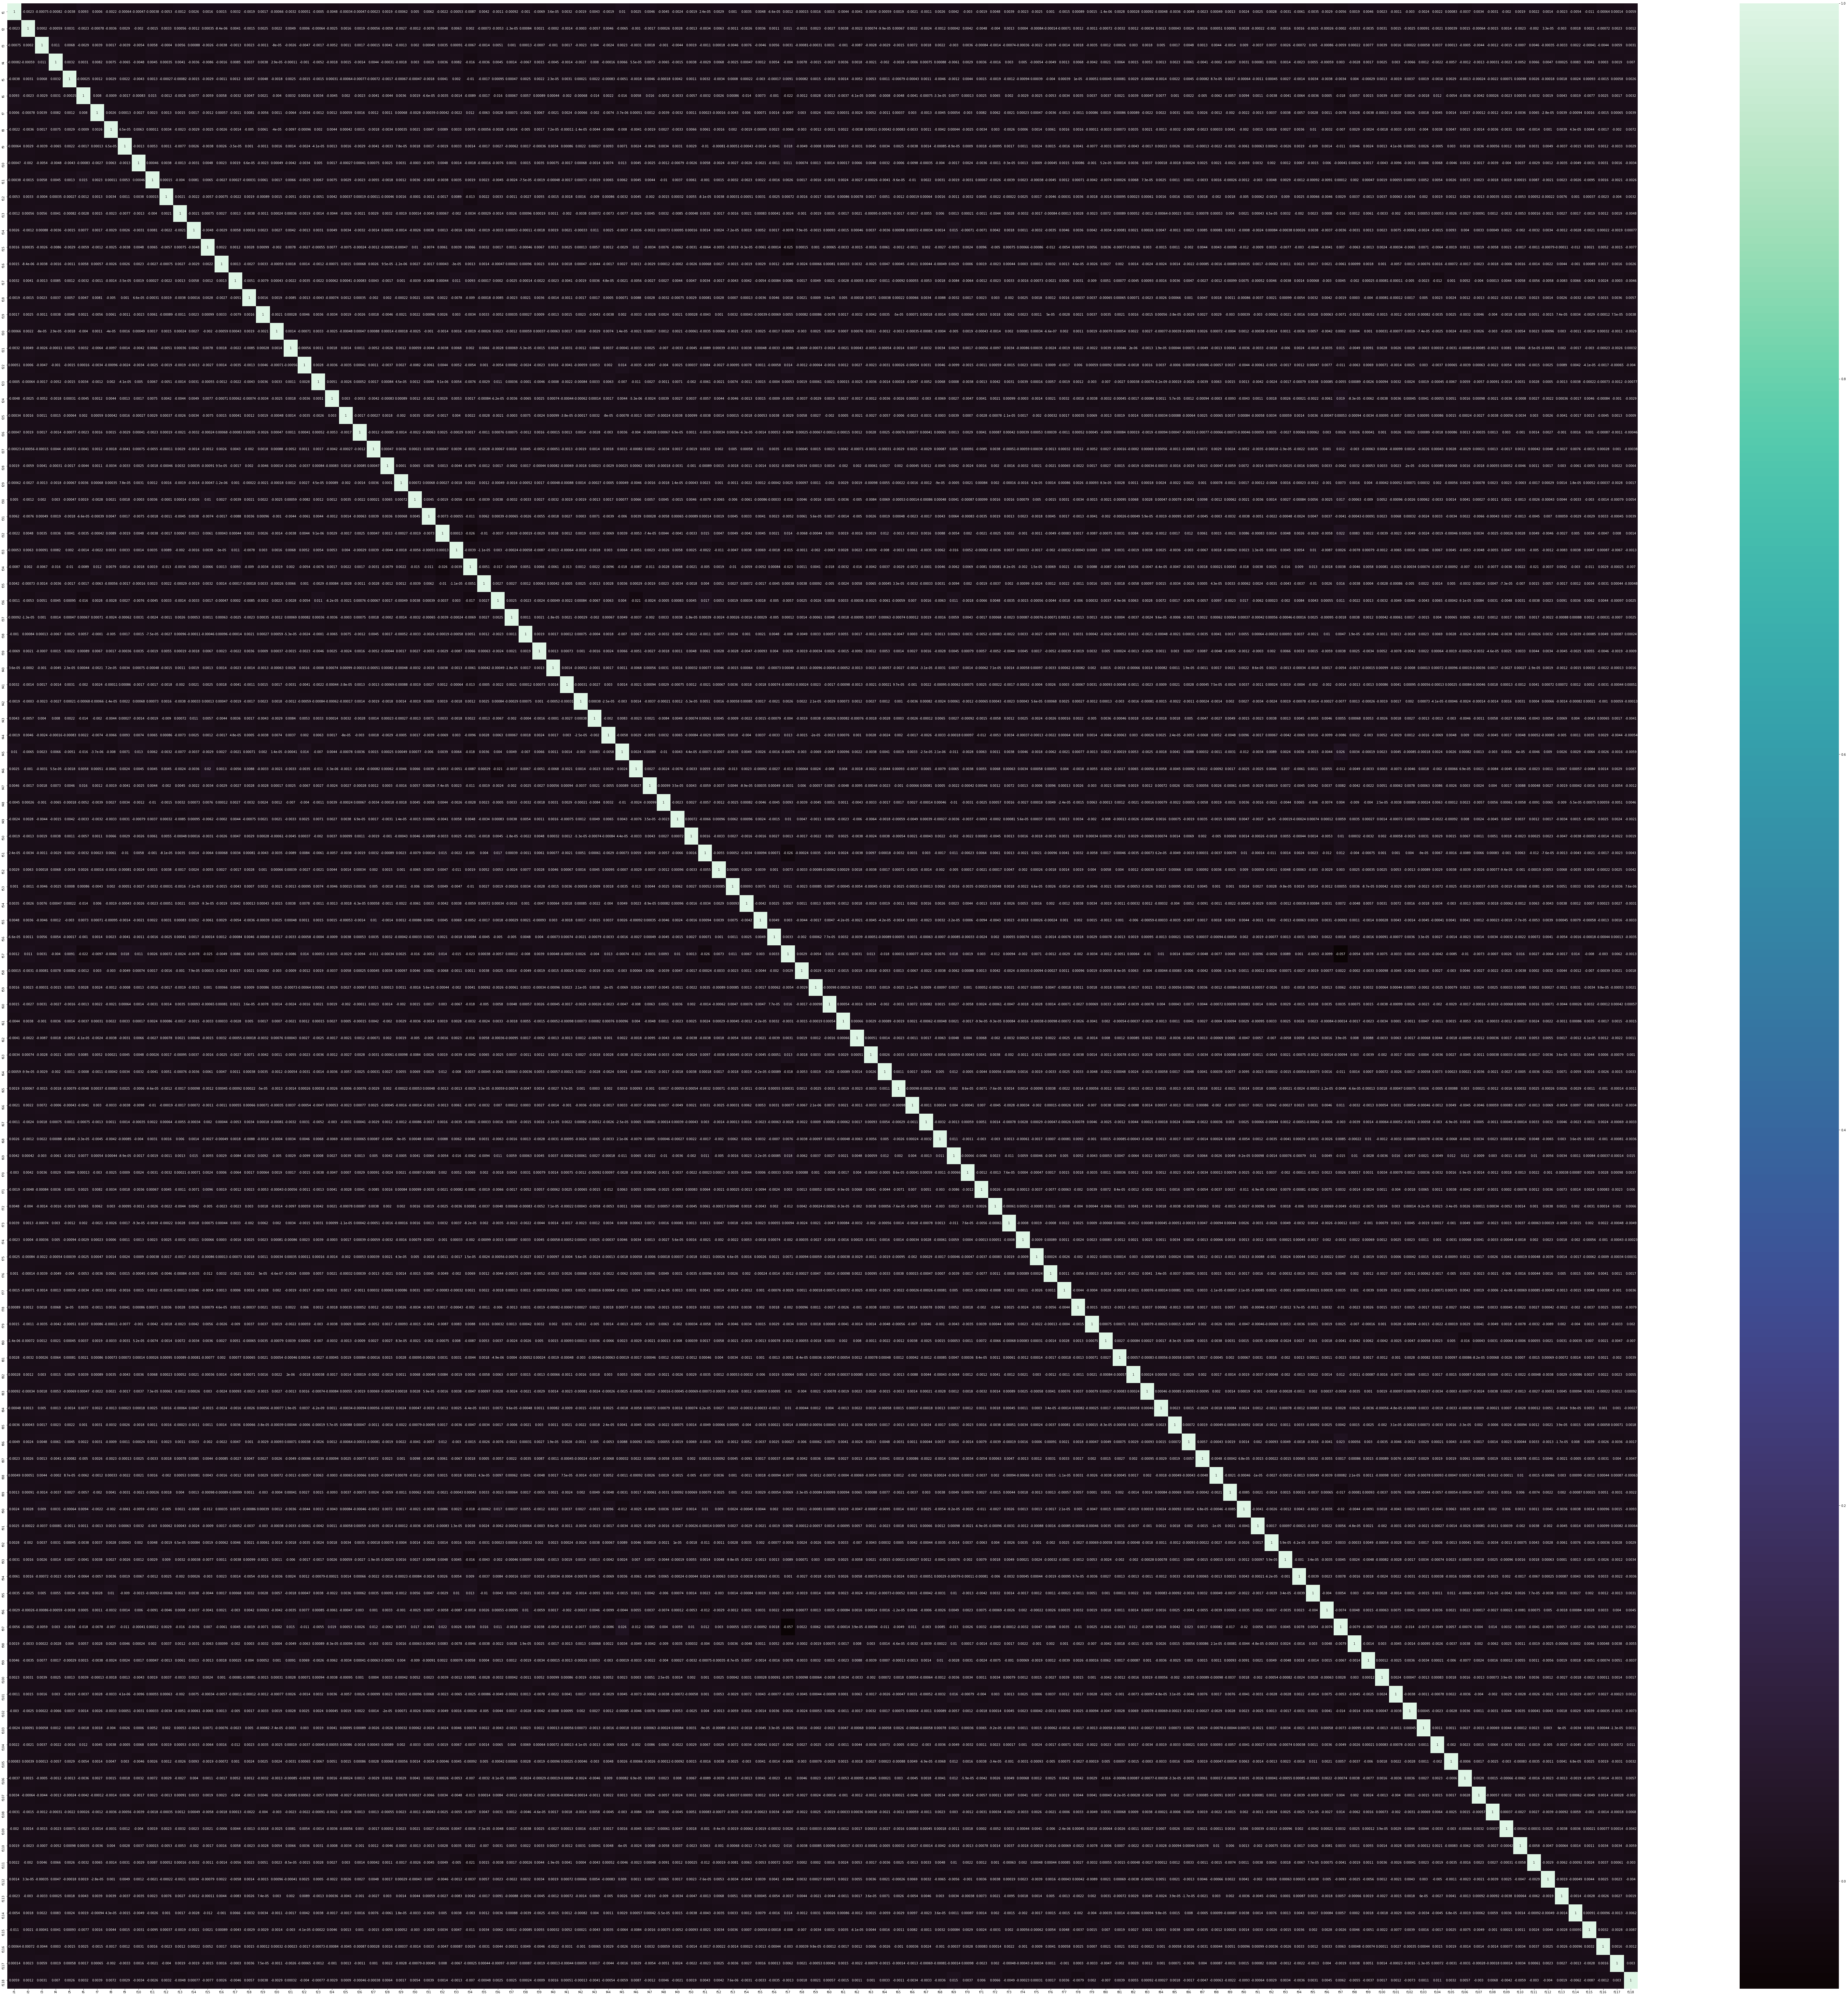

In [9]:
# Correlation heatmap
# Roughly no correlation between features
fig = plt.gcf()
fig.set_size_inches(120, 120)
correlations = train_data[features].corr()
sns.heatmap(data=correlations, annot=True, cmap='mako')

In [10]:
# Are there discrete features?
# Blank array = no discrete features; all continuous
discrete_cols = []

for col in features:
    if np.array_equal(train_data[col].values, train_data[col].values.astype(int)):
        discrete_cols.append(col)
print(discrete_cols)

[]


In [11]:
# Check for class imbalance
counts = train_data[label].value_counts()
counts

claim
0        480404
1        477515
dtype: int64

([<matplotlib.axis.XTick at 0x7f080a259ed0>,
 [Text(0, 0, ''), Text(0, 0, '')])

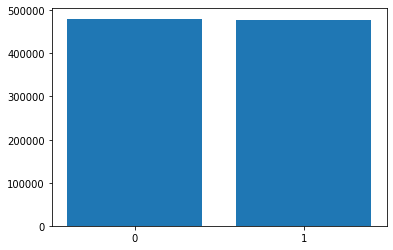

In [12]:
# Classes are roughly balanced
plt.bar([0,1], counts)
plt.xticks(ticks=[0,1])

## Data cleaning

In [13]:
# Have a column that counts nulls - https://www.kaggle.com/c/tabular-playground-series-sep-2021/discussion/270206 (TBD)
train_data['num_of_nulls'] = train_data[features].isnull().sum(axis=1)
test_data['num_of_nulls'] = test_data[features].isnull().sum(axis=1)

train_data['standard_deviations'] = train_data[features].std(axis=1)
test_data['standard_deviations'] = test_data[features].std(axis=1)

train_data['min'] = train_data[features].min(axis=1)
test_data['min'] = train_data[features].min(axis=1)

train_data['max'] = train_data[features].max(axis=1)
test_data['max'] = train_data[features].max(axis=1)

features = train_data.columns.drop('claim')

In [14]:
train_data

f1        f2         f3        f4        f5        f6       f7  \
id                                                                             
0       0.108590  0.004314    -37.566  0.017364  0.289150 -10.25100   135.12   
1       0.100900  0.299610  11822.000  0.276500  0.459700  -0.83733  1721.90   
2       0.178030 -0.006980    907.270  0.272140  0.459480   0.17327  2298.00   
3       0.152360  0.007259    780.100  0.025179  0.519470   7.49140   112.51   
4       0.116230  0.502900   -109.150  0.297910  0.344900  -0.40932  2538.90   
...          ...       ...        ...       ...       ...       ...      ...   
957914  0.098979  0.202530   2192.100  0.348010  0.276430  -0.84065  2214.20   
957915  0.134930  0.413600   1050.100  0.000521 -0.001246   1.76990  3519.90   
957916  0.104660  0.473510   2415.400  0.252230  0.196970  -0.82323  3044.90   
957917  0.118190  0.320870    657.860  0.237290  0.260250  -0.71237   173.20   
957918  0.088832  0.472230   4309.400  0.017016  0.376880   4.81520   458.20   

              f8            f9        f10  ...      f114    f115  \
id                                         ...                     
0       168900.0  3.992400e+14     86.489  ...   4378.80  1.2096   
1       119810.0  3.874100e+15   9953.600  ...    913.23  1.2464   
2       360650.0  1.224500e+13  15827.000  ...  45119.00  1.1764   
3       259490.0  7.781400e+13    -36.837  ...   4952.40  1.1784   
4        65332.0  1.907200e+15    144.120  ...   3856.50  1.4830   
...          ...           ...        ...  ...       ...     ...   
957914   26246.0  1.061600e+15  10882.000  ...  27415.00  1.2160   
957915  862290.0  7.321400e+13   2869.000  ...  13826.00  1.3320   
957916   13832.0  2.693300e+12   2294.700  ...   8655.10  1.1113   
957917   20811.0  9.711000e+14  14315.000  ...   3842.10  1.1941   
957918   42183.0  1.805500e+13   3155.700  ...   5901.40  1.0907   

                f116     f117     f118  claim  num_of_nulls  \
id                                                            
0       8.613400e+14   140.10  1.01770      1             1   
1       7.575100e+15  1861.00  0.28359      0             0   
2       3.218100e+14  3838.20  0.40690      1             5   
3       4.533000e+12  4889.10  0.51486      1             2   
4      -8.991300e+12      NaN  0.23049      1             8   
...              ...      ...      ...    ...           ...   
957914  2.139400e+13  2612.00  0.42597      0             0   
957915  1.829400e+17  3300.50  0.92974      1             4   
957916  1.925800e+16   297.61  0.91446      0             0   
957917  1.248300e+16  5212.10  0.20942      1             1   
957918  1.213800e+16  2132.30  0.38069      0             4   

        standard_deviations           min           max  
id                                                       
0              1.012911e+15 -3.756600e+01  1.090600e+16  
1              2.945630e+15 -5.675800e+01  3.079400e+16  
2              3.105740e+13 -4.453500e+13  3.218100e+14  
3              1.763090e+14 -9.299200e+13  1.894700e+15  
4              9.816106e+14 -8.991300e+12  1.012500e+16  
...                     ...           ...           ...  
957914         5.066155e+15 -1.517300e+07  5.503200e+16  
957915         1.713370e+16 -1.614300e+02  1.829400e+17  
957916         1.781425e+15 -5.898800e+02  1.925800e+16  
957917         6.047720e+15 -7.929200e+13  6.432400e+16  
957918         3.000558e+15 -2.451000e+10  2.946300e+16  

[957919 rows x 123 columns]

In [15]:
X = train_data[features].values
y = train_data[label].values
X_test = test_data.values

In [16]:
# Scale values to roughly be in the same range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

X

array([[ 0.42212051, -2.33605704, -0.6400283 , ..., -0.77430665,
         0.20084107, -0.75273696],
       [ 0.24559745, -0.31694712,  1.20845792, ..., -0.45832463,
         0.20084107, -0.44448412],
       [ 2.01610764, -2.41327995, -0.49276183, ..., -0.93483074,
         0.12893809, -0.91678597],
       ...,
       [ 0.33190782,  0.87210758, -0.25769779, ..., -0.64866155,
         0.20084107, -0.62328565],
       [ 0.64248739, -0.17158023, -0.53163602, ...,  0.04883895,
         0.07282197,  0.07521206],
       [-0.03142208,  0.86335548,  0.03750971, ..., -0.44934431,
         0.20080149, -0.46511388]])

In [17]:
# Fill in missing values with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
X_test = imputer.transform(X_test)

X

array([[ 0.42212051, -2.33605704, -0.6400283 , ..., -0.77430665,
         0.20084107, -0.75273696],
       [ 0.24559745, -0.31694712,  1.20845792, ..., -0.45832463,
         0.20084107, -0.44448412],
       [ 2.01610764, -2.41327995, -0.49276183, ..., -0.93483074,
         0.12893809, -0.91678597],
       ...,
       [ 0.33190782,  0.87210758, -0.25769779, ..., -0.64866155,
         0.20084107, -0.62328565],
       [ 0.64248739, -0.17158023, -0.53163602, ...,  0.04883895,
         0.07282197,  0.07521206],
       [-0.03142208,  0.86335548,  0.03750971, ..., -0.44934431,
         0.20080149, -0.46511388]])

In [18]:
# Fix skew with Yeo Johnson transformation (to address positive and negative values)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(X)
X = pt.transform(X)
X_test = pt.transform(X_test)

X

array([[ 0.42766349, -1.21631621, -1.08909625, ..., -1.14942466,
         0.43873777, -1.11908836],
       [ 0.24756054, -0.27591526,  0.57476137, ..., -0.58762158,
         0.43873777, -0.56985326],
       [ 2.11048375, -1.2396438 , -0.74975816, ..., -1.48582368,
         0.21185351, -1.46525983],
       ...,
       [ 0.33541301,  1.24496079, -0.32392952, ..., -0.91026599,
         0.43873777, -0.87255714],
       [ 0.65468651, -0.15855149, -0.83361319, ...,  0.0474597 ,
         0.09610275,  0.07191576],
       [-0.03138798,  1.22877459,  0.03624721, ..., -0.57356301,
         0.43858225, -0.60257138]])

In [19]:
# Turn unskewed features to dataframe so we can plot it on histograms
unskewed_features = pd.DataFrame(data=X, columns=features)
# Skews not fixed completely but, outliers aren't as extreme (fatter tails)
unskewed_histograms = unskewed_features.hist(figsize = (120, 640), bins=50, grid = False, xlabelsize=8, ylabelsize=8, layout = (101,4))

## Baseline models

In [20]:
from sklearn.metrics import auc, roc_curve

# This function takes the model and data and returns auc
def get_auc(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    val_predictions = model.predict(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, val_predictions)
    return auc(fpr, tpr)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, shuffle=True)

In [22]:
# RGF (Regularized Greedy Forest) - https://www.kaggle.com/carlmcbrideellis/introduction-to-the-regularized-greedy-forest
!pip install rgf_python

In [23]:
# With results, we can decide which models are worth tuning hyperparameters on
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from rgf.sklearn import FastRGFClassifier
from catboost import CatBoostClassifier

model_list = [CatBoostClassifier(eval_metric='AUC'), FastRGFClassifier(), LogisticRegression(), RandomForestClassifier(), XGBClassifier(), LGBMClassifier(objective='binary'), HistGradientBoostingClassifier()]

for model in model_list:
    print('{model_name} AUC: {auc:.3f}'.format(model_name = str(model), auc = get_auc(model, X_train, y_train.ravel(), X_val, y_val.ravel())))

Learning rate set to 0.170849
0:	total: 481ms	remaining: 8m
1:	total: 791ms	remaining: 6m 34s
2:	total: 1.07s	remaining: 5m 55s
3:	total: 1.35s	remaining: 5m 36s
4:	total: 1.63s	remaining: 5m 24s
5:	total: 1.94s	remaining: 5m 21s
6:	total: 2.25s	remaining: 5m 19s
7:	total: 2.54s	remaining: 5m 14s
8:	total: 2.82s	remaining: 5m 10s
9:	total: 3.13s	remaining: 5m 9s
10:	total: 3.44s	remaining: 5m 9s
11:	total: 3.71s	remaining: 5m 5s
12:	total: 3.97s	remaining: 5m 1s
13:	total: 4.21s	remaining: 4m 56s
14:	total: 4.47s	remaining: 4m 53s
15:	total: 4.71s	remaining: 4m 49s
16:	total: 4.99s	remaining: 4m 48s
17:	total: 5.27s	remaining: 4m 47s
18:	total: 5.52s	remaining: 4m 45s
19:	total: 5.77s	remaining: 4m 42s
20:	total: 6.01s	remaining: 4m 40s
21:	total: 6.25s	remaining: 4m 37s
22:	total: 6.51s	remaining: 4m 36s
23:	total: 6.77s	remaining: 4m 35s
24:	total: 7.03s	remaining: 4m 34s
25:	total: 7.31s	remaining: 4m 33s
26:	total: 7.56s	remaining: 4m 32s
27:	total: 7.81s	remaining: 4m 31s
28:	tota

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:25:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) AUC: 0.772
LGBMClassifier(objective='binary') AUC: 0.773
HistGradientBoostingClassifier() AUC: 0.773
